# CS372 (spring 2020)
CS 372 : Computer graphics course was interrupted by the covid 19 pandemic. In these extraordinary times, an unprecedented method was used for the grading, grading was done on the basis of 3 tests with heavy weightage given to mid semester exam conducted successfully in campus before the lockdown :
#### 1. Class Test 
#### 2. Mid Semester Exam
#### 3. Assignment
### Total marks for Class Test, Mid Sem, Assignment = 20, 30, 50
### Weightage for Class Test, Mid Sem, Assignment = 20, 50, 30

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [275]:
df = pd.read_excel(r'C:\Users\ADMIN\Downloads\CS372.xlsx')

#Total marks for Class Test, Mid Sem, Assignment = 20 30 50
#Weightage for Class Test, Mid Sem, Assignment = 20 50 30

#effective total = 34

df['aggregate'] = (df['Class Test']*0.2 + df['Mid Sem']*0.5 + df['Assignment']*0.3)/0.34 

df.head()

,Sl No.,Roll Number,Class Test,Mid Sem,Assignment,aggregate
0,1,1701CS02,0,25,50,80.882353
1,2,1701CS04,7,30,42,85.294118
2,3,1701CS06,0,25,50,80.882353
3,4,1701CS07,20,30,45,95.588235
4,5,1701CS08,14,30,45,92.058824


Text(0, 0.5, 'Marks%')

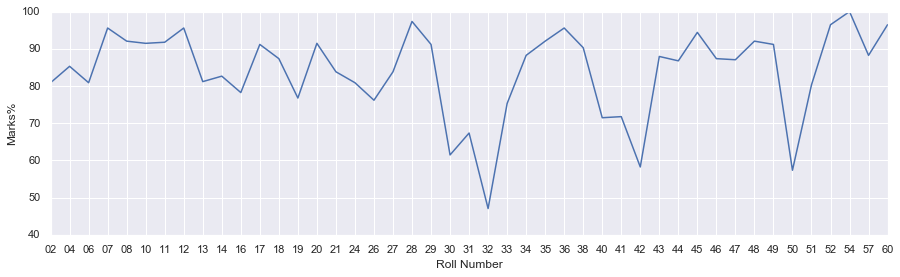

In [276]:
fig = plt.figure(figsize=(15,4))
plt.plot(df['Roll Number'].map(lambda x : x[-2:]),df['aggregate'])
plt.xlabel('Roll Number')
plt.ylabel('Marks%')

In [277]:
df = df.sort_values(by='aggregate',ascending=False)

df.index = np.arange(1,46,1)
df.drop('Sl No.',axis=1,inplace=True)


In [278]:
df.head(10)

,Roll Number,Class Test,Mid Sem,Assignment,aggregate
1,1701CS54,20,30,50,100.000000
2,1701CS28,20,30,47,97.352941
3,1701CS52,20,30,46,96.470588
4,1701CS60,20,30,46,96.470588
5,1701CS07,20,30,45,95.588235
6,1701CS12,20,30,45,95.588235
7,1701CS36,20,30,45,95.588235
8,1701CS45,20,28,47,94.411765
9,1701CS35,20,27,46,92.058824
10,1701CS48,20,30,41,92.058824


In [279]:
df.describe()

,Class Test,Mid Sem,Assignment,aggregate
count,45.00000,45.0000,45.000000,45.000000
mean,12.60000,26.0000,43.466667,84.000000
std,7.67641,4.8053,4.625031,11.692358
min,0.00000,11.0000,30.000000,47.058824
25%,7.00000,23.0000,40.000000,80.294118
50%,13.00000,27.0000,45.000000,87.352941
75%,20.00000,30.0000,46.000000,91.764706
max,20.00000,30.0000,50.000000,100.000000


In [280]:
stud_count = len(df) # number of students
df['percentile'] = ((stud_count - df.index + 1)/stud_count)*100
df.sample(5)

,Roll Number,Class Test,Mid Sem,Assignment,aggregate,percentile
26,1701CS04,7,30,42,85.294118,44.444444
42,1701CS30,0,19,38,61.470588,8.888889
1,1701CS54,20,30,50,100.000000,100.000000
16,1701CS49,20,27,45,91.176471,66.666667
18,1701CS38,14,27,48,90.294118,62.222222


In [281]:
#divide students into 2 categories on basis of percentile
#comparing top 20% students with bottom 80%
category = {1:'Top 20%',0: 'Bottom 80%'}
df['class_'] = (df['percentile']/80).astype(int)
df['class_'] = df['class_'].map(lambda x : category[x])
df['class_'] = df.class_.astype('category')
df.sample(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 45
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Roll Number  45 non-null     object  
 1   Class Test   45 non-null     int64   
 2   Mid Sem      45 non-null     int64   
 3   Assignment   45 non-null     int64   
 4   aggregate    45 non-null     float64 
 5   percentile   45 non-null     float64 
 6   class_       45 non-null     category
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 2.6+ KB


In [282]:
df.drop('percentile',axis=1,inplace=True)
df.sample(5)

,Roll Number,Class Test,Mid Sem,Assignment,aggregate,class_
10,1701CS48,20,30,41,92.058824,Top 20%
35,1701CS16,13,30,30,78.235294,Bottom 80%
33,1701CS06,0,25,50,80.882353,Bottom 80%
19,1701CS34,20,22,50,88.235294,Bottom 80%
31,1701CS02,0,25,50,80.882353,Bottom 80%


Text(0, 0.5, 'Marks%')

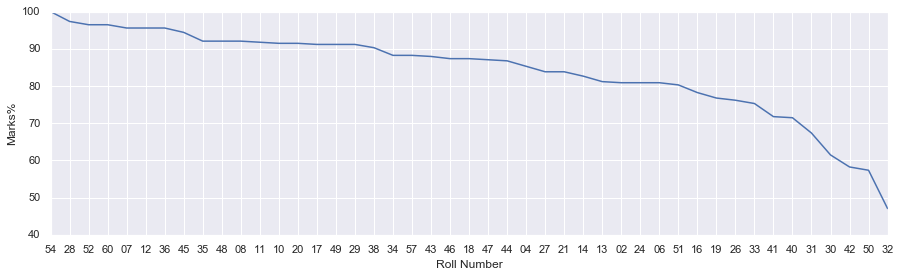

In [283]:
fig = plt.figure(figsize=(15,4))
plt.plot(df['Roll Number'].map(lambda x : x[-2:]),df['aggregate'])
plt.xlabel('Roll Number')
plt.ylabel('Marks%')

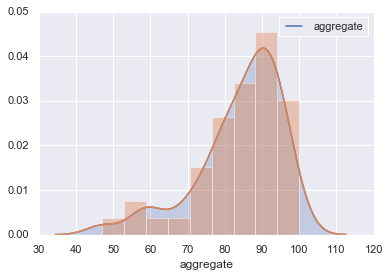

In [284]:
#marks distribution among students
sns.kdeplot(df['aggregate'], shade = True)
sns.distplot(df['aggregate'])

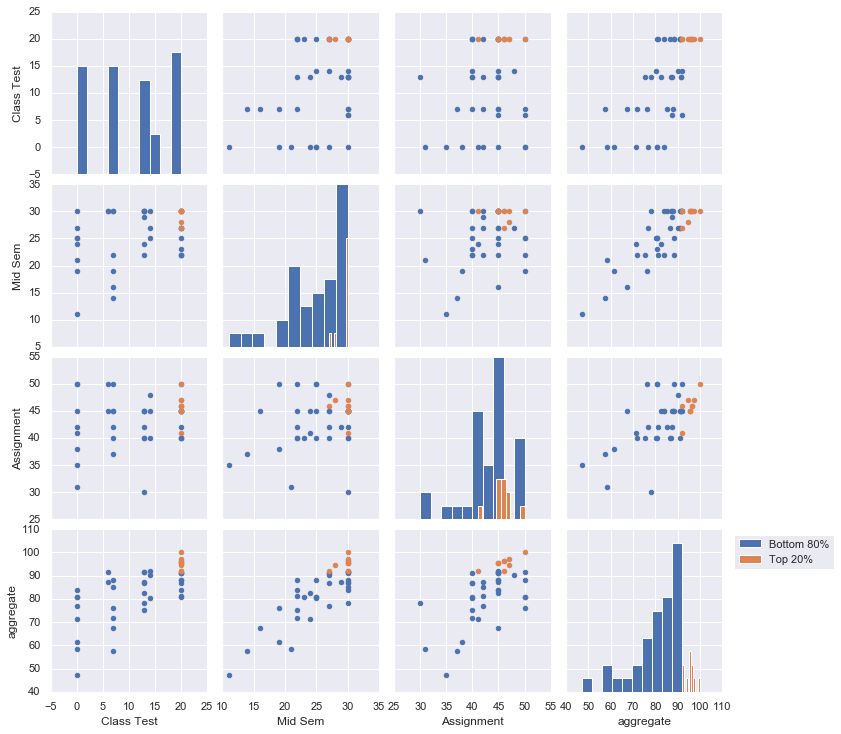

In [296]:
g = sns.PairGrid(df,hue='class_')
def scatter_fake_diag(x, y, *a, **kw):
    if x.equals(y):
        kw["color"] = (0, 0, 0, 0)
    plt.scatter(x, y, *a, **kw)

g.map(scatter_fake_diag)
g.map_diag(plt.hist)
#g.add_legend()
#plt.legend(loc='best')
plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1))

In [297]:
g.savefig("CS372.png")